#Advanced data analytics with PySpark

In [1]:
import findspark
findspark.init()

import pandas as pd
import pyspark

In [2]:
from pyspark.sql import functions as f
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Advance')\
        .getOrCreate()

In [4]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields=data_schema)

In [6]:
df = spark.read.csv(
    r"C:\Users\nobel\OneDrive\Desktop\Spark and data bricks\stocks_price_final.csv",
    sep = ',',
    header = True,
    schema = final_struc
    )

In [8]:
df.head(3)

[Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', data=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

In [9]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [16]:
df = df.drop('market.cap')
df.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.27|55.650002|     62.0|1589600|     62.0|Capital Goods|Biotechnology: La...|  

In [17]:
df.filter("open is null").show()

+----+------+----------+----+----+----+-----+------+--------+-------------+--------------------+--------+
| _c0|symbol|      data|open|high| low|close|volume|adjusted|       sector|            industry|exchange|
+----+------+----------+----+----+----+-----+------+--------+-------------+--------------------+--------+
|4378|  KRKR|2020-05-11|null|null|null| null|  null|    null|Miscellaneous|   Business Services|  NASDAQ|
|5747|  NMTR|2020-01-23|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5748|  NMTR|2020-01-24|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5749|  NMTR|2020-01-27|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5750|  NMTR|2020-01-28|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5751|  NMTR|2020-01-29|null|null|null| null|  null|    null|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5752|  NMTR|2020-01-30|null|null|null| null| 

In [18]:
from pyspark.sql.functions import col, count, when

# Check for null values in the entire DataFrame
null_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

# Show the null values in a tabular format
null_values.show()


+---+------+----+----+----+----+-----+------+--------+------+--------+--------+
|_c0|symbol|data|open|high| low|close|volume|adjusted|sector|industry|exchange|
+---+------+----+----+----+----+-----+------+--------+------+--------+--------+
|  0|     0|   0|2733|2733|2733| 2733|  3827|    2733|     0|       0|       0|
+---+------+----+----+----+----+-----+------+--------+------+--------+--------+



In [19]:
df.na.drop()

DataFrame[_c0: int, symbol: string, data: date, open: double, high: double, low: double, close: double, volume: int, adjusted: double, sector: string, industry: string, exchange: string]

In [20]:
from pyspark.sql.functions import col, min, max, avg, lit

data_transf = df.groupBy("sector") \
    .agg(min("data").alias("From"), 
         max("data").alias("To"), 
         
         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"), 

         min("close").alias("Minimum Closing"), 
         max("close").alias("Maximum Closing"),  

         min("adjusted").alias("Minimum Adjusted Closing"), 
         max("adjusted").alias("Maximum Adjusted Closing"), 

      )

In [21]:
data_transf.toPandas()

,sector,From,To,Minimum Opening,Maximum Opening,Minimum Closing,Maximum Closing,Minimum Adjusted Closing,Maximum Adjusted Closing
0,Miscellaneous,2019-01-02,2020-07-22,0.147,1.059990e+03,0.1361,1.035830e+03,0.136100,1.035830e+03
1,Health Care,2019-01-02,2020-07-22,0.072,1.860000e+05,0.0710,1.870000e+05,0.071000,1.870000e+05
2,Public Utilities,2019-01-02,2020-07-22,0.331,2.800000e+02,0.3250,2.822200e+02,0.325000,2.806739e+02
3,Energy,2019-01-02,2020-07-22,0.100,9.050000e+02,0.0900,9.010400e+02,0.090000,8.790570e+02
4,Consumer Non-Durables,2019-01-02,2020-07-22,0.120,6.550000e+02,0.1200,6.641300e+02,0.120000,6.641300e+02
5,Finance,2019-01-02,2020-07-22,0.250,1.336930e+03,0.2700,1.341080e+03,0.270000,1.341080e+03
6,Basic Industries,2019-01-02,2020-07-22,0.230,1.601682e+08,0.2300,1.583766e+08,0.230000,1.572494e+08
7,Capital Goods,2019-01-02,2020-07-22,0.130,4.025000e+03,0.1200,4.037770e+03,-1.230099,4.037770e+03
8,Technology,2019-01-02,2020-07-22,0.140,2.704000e+03,0.1300,2.736000e+03,0.130000,2.736000e+03
9,Consumer Services,2019-01-02,2020-07-22,0.100,1.543750e+04,0.1340,1.984375e+04,0.134000,1.984375e+04


In [22]:
data_df = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()
data_df

,industry,avg(open),avg(close),avg(adjusted)
0,Finance/Investors Services,5.134402,5.136631,4.991354
1,Miscellaneous,16.385883,16.359879,16.148959
2,Investment Bankers/Brokers/Service,58.950581,58.983086,58.157837
3,Food Distributors,43.274509,43.273178,42.910476
4,Miscellaneous manufacturing industries,15.660586,15.650935,15.369819
...,...,...,...,...
130,Wholesale Distributors,16.608839,16.602717,16.602717
131,Electronics Distribution,6.428699,6.430408,6.377569
132,Tools/Hardware,70.412755,70.475944,69.670351
133,Tobacco,32.467832,32.455689,32.213047


<Axes: >

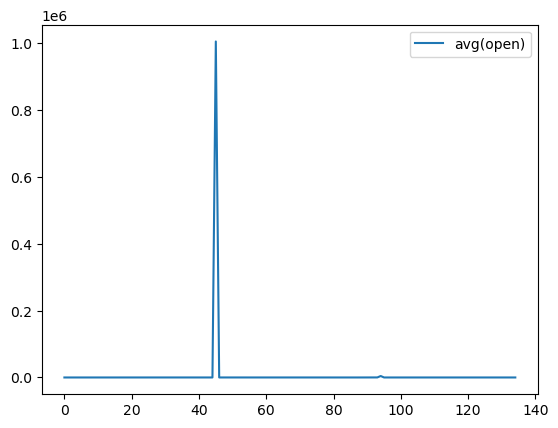

In [23]:
data_df[['industry', 'avg(open)']].plot()

<Axes: >

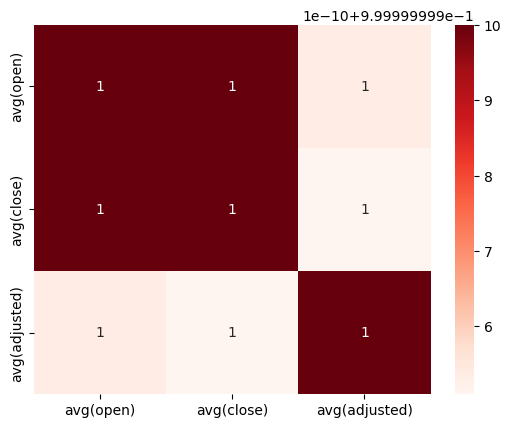

In [25]:
import seaborn as sn
# Select only numeric columns
numeric_columns = data_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
corr = numeric_columns.corr()

# Plot the heatmap
sn.heatmap(corr, cmap="Reds", annot=True)

In [ ]:
# Parquet, saving the data in selected format
df.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset.csv')